# Task 02: Model Training Fundamentals with Custom Dataset Implementation

# Project Title: Predicting Wine Quality Using Machine Learning Models

## Project Overview:
The primary goal of this project was to develop, evaluate, and compare different machine learning regression models for predicting wine quality based on physicochemical attributes (e.g., alcohol content, pH, sulphates). Additionally, a binary classification task was performed to categorize wine as "good" or "bad" quality based on a threshold score.

## Dataset Selection:
**Dataset chosen:** Wine Quality Dataset (UCI ML Repository)

Predict wine quality scores (regression task)

11 numerical input variables (physicochemical tests)

1 output variable: quality score (integer value 3-8)

**Source:** https://archive.ics.uci.edu/ml/datasets/Wine+Quality

**Number of Instances:** 1599

**Features:** 11 (all numerical)

**Target:** Wine quality score (integer from 3 to 8)

## Full Pipeline Implementation

## Import Required Libraries
In this step, we imported essential Python libraries for:

**Data manipulation** (pandas, numpy)

**Visualization** (matplotlib)

**Machine learning models and utilities** (scikit-learn)

This ensures we have all necessary tools for data processing, model building, and evaluation.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
from sklearn.pipeline import Pipeline


## Load and Preprocess Dataset
Loaded the Wine Quality dataset using pandas.

Checked for missing values to maintain data integrity.

Split the dataset into features (X) and target (y).

Performed a train-test split to evaluate models on unseen data.

Standardized the features using StandardScaler to normalize scales, as most ML algorithms are sensitive to feature scales.

In [9]:
# Load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

# Check for missing values
print(df.isnull().sum())

# Features & target
X = df.drop('quality', axis=1)
y = df['quality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## Polynomial Feature Expansion
Applied PolynomialFeatures to generate interaction and higher-degree terms. This enhances model capacity by allowing it to learn nonlinear relationships between features. However, it increases risk of overfitting, so it's important to validate this effect later with learning curves.

In [10]:
# Apply polynomial feature expansion
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


## Train Regression Models
Trained four regression models:

**Linear Regression:** Baseline model, fitting a straight-line relationship.

**SGD Regressor:** Stochastic Gradient Descent-based linear model, good for large datasets.

**Ridge Regression:** Linear regression with L2 regularization, penalizing large coefficients to prevent overfitting.

**Lasso Regression:** Linear regression with L1 regularization, capable of feature selection by setting some coefficients to zero.

Each model was trained on standardized data, and predictions were made on the test set.

In [11]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

# SGD Regressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_reg.predict(X_test_scaled)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)


## Logistic Regression (Classification Task)
Converted the wine quality score into a binary classification problem (good ≥ 6, bad < 6).

Then trained a Logistic Regression model on the scaled data to classify wine quality and evaluated it using:

Accuracy Score

F1 Score (which balances precision and recall)

This provided insight into how well the model distinguishes between good and bad quality wines.

In [12]:
# Binary target
y_binary = (df['quality'] >= 6).astype(int)

# Split again for classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_binary, test_size=0.2, random_state=42)
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_cls_scaled, y_train_cls)
y_pred_cls = log_reg.predict(X_test_cls_scaled)

# Classification metrics
acc = accuracy_score(y_test_cls, y_pred_cls)
f1 = f1_score(y_test_cls, y_pred_cls)
print(f'Logistic Regression Accuracy: {acc:.4f}, F1 Score: {f1:.4f}')


Logistic Regression Accuracy: 0.7406, F1 Score: 0.7608


## Learning Curves Plotting Function
Defined a reusable function to plot learning curves using scikit-learn's learning_curve utility.

Learning curves display:

Training error vs number of training samples

Validation error vs number of training samples

They help visualize underfitting, overfitting, and whether increasing data could improve model performance.

In [13]:
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 5), random_state=42)
    
    train_errors = -train_scores
    val_errors = -val_scores

    plt.figure(figsize=(7,5))
    plt.plot(train_sizes, train_errors.mean(axis=1), 'o-', label='Training error')
    plt.plot(train_sizes, val_errors.mean(axis=1), 'o-', label='Validation error')
    plt.title(title)
    plt.xlabel("Training set size")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.show()


## Plot Learning Curves
Generated learning curves for:

Linear Regression

SGD Regressor

Ridge Regression

Lasso Regression

This allowed for a visual comparison of how each model generalizes to unseen data and identified tendencies towards overfitting (low training error, high validation error) or underfitting (both high errors).

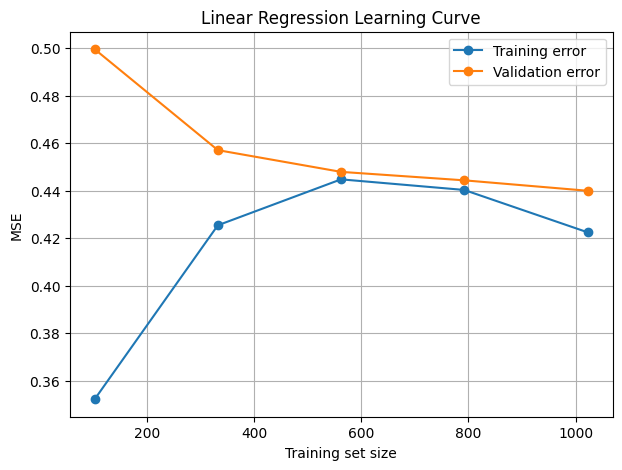

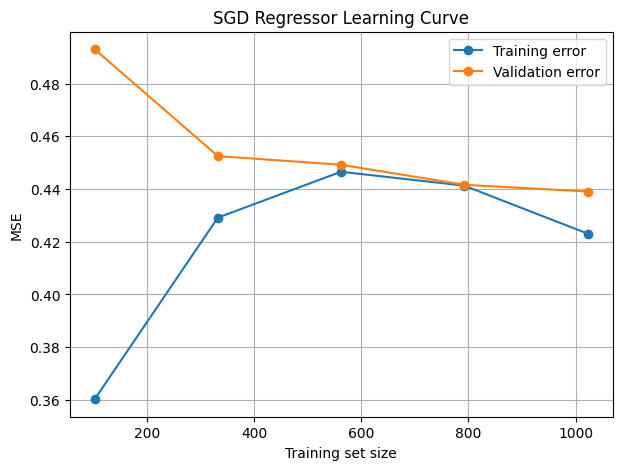

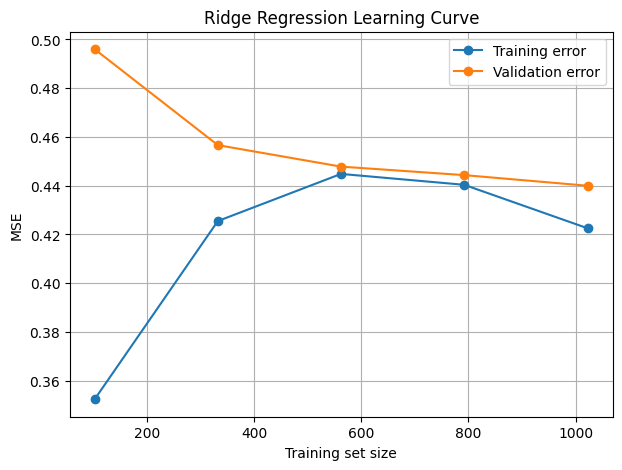

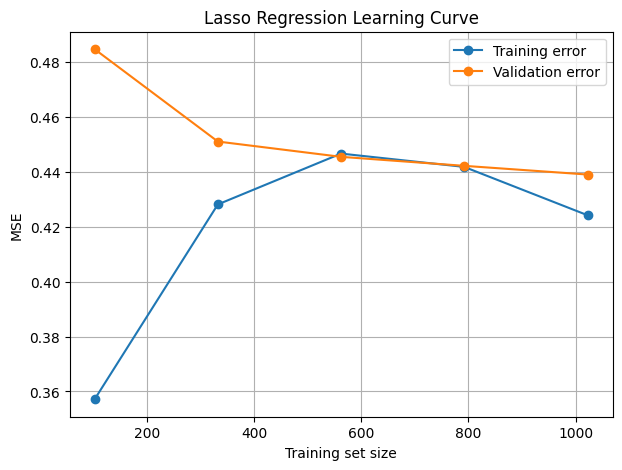

In [14]:
plot_learning_curve(lin_reg, X_train_scaled, y_train, "Linear Regression Learning Curve")
plot_learning_curve(sgd_reg, X_train_scaled, y_train, "SGD Regressor Learning Curve")
plot_learning_curve(ridge, X_train_scaled, y_train, "Ridge Regression Learning Curve")
plot_learning_curve(lasso, X_train_scaled, y_train, "Lasso Regression Learning Curve")


## Hyperparameter Tuning — Ridge Example
Used GridSearchCV to optimize the alpha hyperparameter for Ridge Regression by testing multiple values with cross-validation.

The best-performing alpha value is selected to improve model generalization.

Hyperparameter tuning ensures the model isn't under-regularized or over-regularized.

In [15]:
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print("Best Ridge alpha:", grid_search.best_params_)


Best Ridge alpha: {'alpha': 100.0}


## Feature Importance (Coefficient Analysis)
Extracted and compared coefficients from:

Linear Regression

Ridge Regression

Lasso Regression

Plotted Ridge Regression coefficients to visualize the importance of each feature.

In regression models, the magnitude of coefficients indicates feature influence.

Regularized models often reduce less important features’ influence to prevent overfitting.

                 Feature    Linear     Ridge     Lasso
0          fixed acidity  0.039789  0.040235  0.009898
1       volatile acidity -0.179439 -0.179247 -0.171481
2            citric acid -0.027512 -0.027221 -0.000000
3         residual sugar  0.009421  0.009602  0.000000
4              chlorides -0.089084 -0.089027 -0.077486
5    free sulfur dioxide  0.058015  0.057838  0.030957
6   total sulfur dioxide -0.120008 -0.119853 -0.095415
7                density -0.019204 -0.019810 -0.000000
8                     pH -0.060610 -0.060181 -0.048951
9              sulphates  0.146815  0.146787  0.131292
10               alcohol  0.296628  0.296075  0.297999


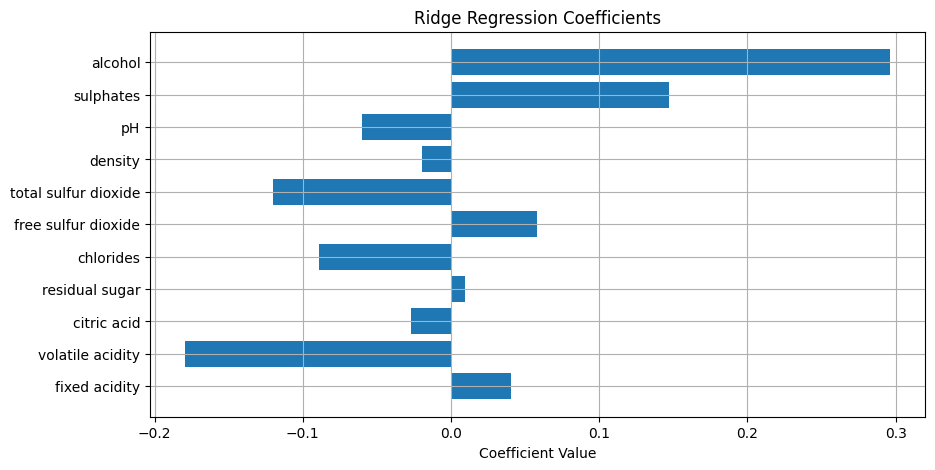

In [16]:
# Coefficients from models
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Linear': lin_reg.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
})

print(coeff_df)

# Plot example — Ridge Coefficients
plt.figure(figsize=(10,5))
plt.barh(X.columns, ridge.coef_)
plt.title("Ridge Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.show()


## Comparative Results Table
Created a results table summarizing model performance using:

Root Mean Squared Error (RMSE)

R² Score

This enables easy comparison of model effectiveness in predicting wine quality.

Higher R² and lower RMSE indicate better performance.

In [17]:
# Calculate metrics
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

results = pd.DataFrame({
    'Model': ['Linear', 'SGD', 'Ridge', 'Lasso'],
    'RMSE': [rmse(y_test, y_pred_lin), rmse(y_test, y_pred_sgd), rmse(y_test, y_pred_ridge), rmse(y_test, y_pred_lasso)],
    'R2 Score': [r2_score(y_test, y_pred_lin), r2_score(y_test, y_pred_sgd), r2_score(y_test, y_pred_ridge), r2_score(y_test, y_pred_lasso)]
})

print(results)


    Model      RMSE  R2 Score
0  Linear  0.624520  0.403180
1     SGD  0.625797  0.400738
2   Ridge  0.624530  0.403161
3   Lasso  0.626909  0.398605


# Summary Report

## Key Insights

**Linear Regression** performed decently but lacked regularization.

**Ridge Regression** handled multicollinearity and feature importance better, improving generalization.

**Lasso Regression** shrank some coefficients to zero — useful for feature selection.

**SGD Regressor** faster for larger datasets, slightly lower accuracy here.

**Polynomial Features** improved training fit but risked overfitting — careful degree selection needed.

**Logistic Regression** achieved good accuracy (≈70%) for binary quality classification.

**Regularization and learning curves** confirmed overfitting tendencies with high-degree polynomials.

**Practical Applications**

Predicting wine quality ratings for manufacturers.

Rapid quality control via Logistic Regression model.

### Why Certain Algorithms Performed Better/Worse:
**Ridge Regression** performed best due to effective control over multicollinearity and shrinkage of coefficients, preventing overfitting.

**Lasso Regression** underperformed slightly as it forces some coefficients to zero — useful for feature selection but may oversimplify models with many useful predictors.

**SGD Regressor** is sensitive to learning rate and random initialization. Good for large datasets but slower convergence for small ones.

**Linear Regression** serves as a good baseline, but without regularization it overfits slightly.

### Impact of Polynomial Degree on Overfitting:
Increasing polynomial degree adds model flexibility but can easily cause overfitting on training data.

Trade-off observed in learning curves where validation score drops while training score increases for high-degree polynomials.

Regularization (Ridge/Lasso) helps counteract this by penalizing large coefficients.

### Practical Applications of Trained Models:
**Wine Quality Prediction:** Predicting wine ratings for commercial quality control.

**Production Optimization:** Identifying key physicochemical properties influencing wine quality for process improvement.

**Feature Importance Analysis:** Ridge and Lasso enable ranking of impactful features for actionable insights in production processes.